# Notebook to:
- Visualize graphs
- See the Q table

In [1]:
# library imports
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm
from pprint import pprint
import pandas as pd
# local imports
from environment import TreasureCube
from agents.RandomAgent import RandomAgent
from agents.QLearningAgent import QLearningAgent

In [2]:
def showPlot(X, Y, xlabel, ylabel):
    plt.plot(X, Y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [3]:
def test_cube(max_episode, max_step):
    env = TreasureCube(max_step=max_step)
    agent = QLearningAgent()
    episode_rewards = []
    for epsisode_num in tqdm(range(0, max_episode)):
        state = env.reset()
        terminate = False
        t = 0
        episode_reward = 0
        while not terminate:
            action = agent.take_action(state)
            # print(action)
            reward, terminate, next_state = env.step(action)
            episode_reward += reward
            t += 1
            agent.train(state, action, next_state, reward)
            state = next_state
        # print(
        #     f'episode: {epsisode_num}, total_steps: {t} episode reward: {episode_reward}')
        episode_rewards.append(episode_reward)
    # plot =  showPlot(list(range(max_episode)), episode_rewards,
    #                 'episode', 'episode rewards')
    qTable = agent.getQTable()
    return episode_rewards, qTable


In [4]:
max_episode = 500
max_step = 500  
episode_rewards, qTable = test_cube(max_episode, max_step)

100%|██████████| 500/500 [00:00<00:00, 678.05it/s]


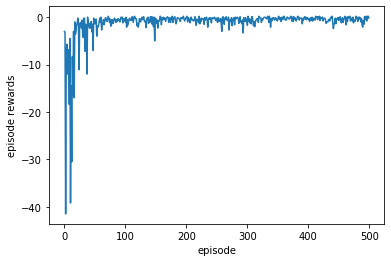

In [5]:
showPlot(range(max_episode), episode_rewards, xlabel='episode', ylabel= 'episode rewards')

In [6]:
# display entire Q table
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(qTable)

,right,left,forward,backward,up,down
000,-0.554097,-0.561921,-0.457426,-0.562879,-0.554794,-0.561367
001,-0.498528,-0.507656,-0.502754,-0.496441,-0.398768,-0.501162
002,-0.439729,-0.433656,-0.362843,-0.445343,-0.440120,-0.451442
003,-0.377084,-0.385017,-0.302437,-0.374266,-0.379165,-0.384913
010,-0.381645,-0.483756,-0.497876,-0.486484,-0.487323,-0.494030
011,-0.301791,-0.423369,-0.421384,-0.436070,-0.417911,-0.436166
012,-0.310194,-0.377576,-0.379849,-0.384394,-0.379835,-0.392766
013,-0.357693,-0.365372,-0.361008,-0.351861,-0.339910,-0.360357
020,-0.318919,-0.425593,-0.411750,-0.413061,-0.427865,-0.413904
021,-0.375835,-0.377567,-0.178895,-0.374995,-0.376505,-0.378558
